## This notebook is to find out any relationships within the dataset

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA


from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2,3,3478.0,2.00,2,1979
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1,3,2750.0,2.43,89,17
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1,5,7036.0,3.00,62,44
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1,2,2112.0,1.25,89,1101
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1,2,1540.0,2.43,119,58
...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,129,1
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1,4,3600.0,2.00,140,264
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1,3,2716.0,2.00,135,1
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,140,2


In [4]:
df.duplicated().sum()

26

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(4389, 12)

In [7]:
X = df.iloc[:,0:12]

In [8]:
X.values

array([[3478.  ,   60.  ,    1.87, ...,    2.  ,    2.  , 1979.  ],
       [4124.  ,   55.  ,    1.65, ...,    2.43,   89.  ,   17.  ],
       [7416.  ,  100.  ,    2.97, ...,    3.  ,   62.  ,   44.  ],
       ...,
       [3720.  ,   42.  ,    1.86, ...,    2.  ,  135.  ,    1.  ],
       [3600.  ,   45.  ,    1.8 , ...,    2.  ,  140.  ,    2.  ],
       [2960.  ,   40.  ,    1.6 , ...,    2.  ,  127.  ,    4.  ]])

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled

array([[-0.25062062,  0.37505294, -0.1685926 , ..., -0.45955904,
        -3.89617947,  4.02887517],
       [-0.14803146,  0.08329422, -0.3579203 , ..., -0.20625234,
        -1.12464051, -0.32957852],
       [ 0.3747604 ,  2.70912268,  0.77804593, ...,  0.12952629,
        -1.98477329, -0.2695998 ],
       ...,
       [-0.21218939, -0.67527844, -0.1771984 , ..., -0.45955904,
         0.3407709 , -0.36512147],
       [-0.2312462 , -0.50022321, -0.22883323, ..., -0.45955904,
         0.50005475, -0.36290003],
       [-0.33288253, -0.79198193, -0.40094933, ..., -0.45955904,
         0.08591674, -0.35845716]])

## Hierarchical Clustering Method

### Plot Dendogram to find optimal number of clusters

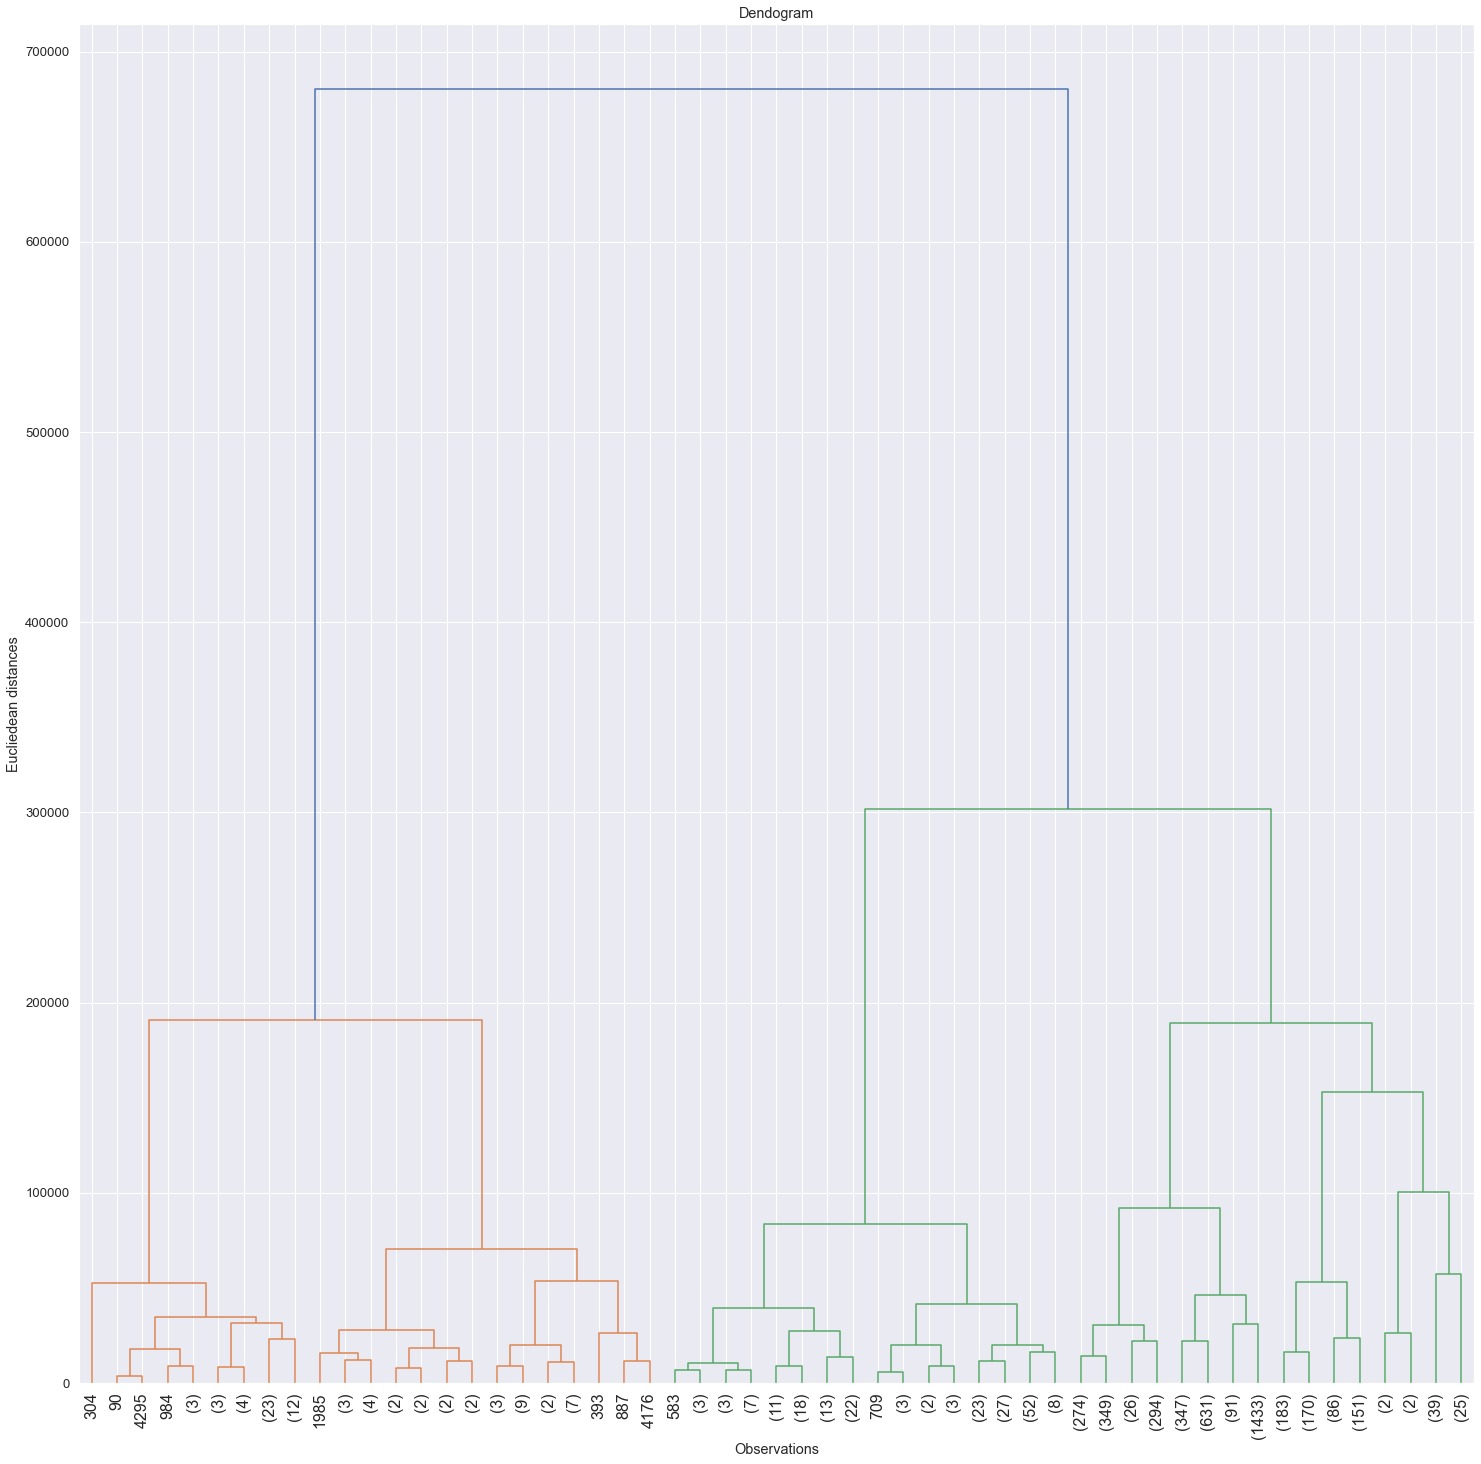

In [12]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=None,
                          p=5,leaf_font_size=16)
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [13]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [14]:
y_hc = hc.fit_predict(X)

In [15]:
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [16]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [17]:
y

,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
4384,1
4385,1
4386,1
4387,1


In [18]:
y['Cluster'].unique()

array([1, 0, 2], dtype=int64)

In [19]:
y['Cluster'].value_counts()

1    4103
2     197
0      89
Name: Cluster, dtype: int64

In [20]:
newdf = pd.concat([df,y],axis=1)

In [21]:
newdf

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count,Cluster
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2.0,3.0,3478.0,2.00,2.0,1979.0,1.0
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1.0,3.0,2750.0,2.43,89.0,17.0,1.0
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1.0,5.0,7036.0,3.00,62.0,44.0,1.0
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1.0,2.0,2112.0,1.25,89.0,1101.0,1.0
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1.0,2.0,1540.0,2.43,119.0,58.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1.0,3.0,2700.0,2.00,129.0,1.0,NaN
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1.0,4.0,3600.0,2.00,140.0,264.0,NaN
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1.0,3.0,2716.0,2.00,135.0,1.0,NaN
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1.0,3.0,2700.0,2.00,140.0,2.0,NaN


In [22]:
meandf = newdf.groupby(by='Cluster').mean()

In [23]:
meandf

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
Cluster,,,,,,,,,,,,
0.0,15543.213483,70.593258,3.043146,4.939326,4448.022472,104.884270,1.123596,4.348315,13891.932584,3.761461,114.842697,104.662921
1.0,4590.132843,52.593336,1.989113,3.572966,2419.187745,97.193385,1.065686,3.083333,3990.909804,2.717444,124.807353,166.862255
2.0,10337.164948,67.810876,3.305567,4.831443,3143.237113,95.302784,1.067010,4.360825,8647.376289,3.796495,118.144330,169.938144


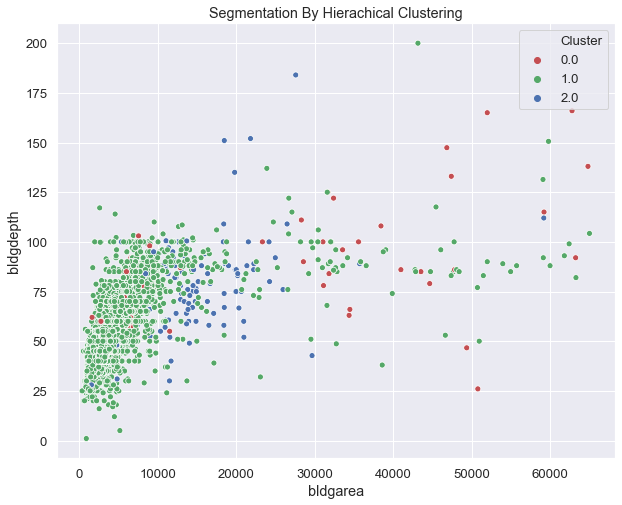

In [25]:
x_axis = newdf['bldgarea']
y_axis = newdf['bldgdepth']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette=['r','g','b'])
plt.title('Segmentation By Hierachical Clustering')
plt.show()

## K-Means Clustering

In [26]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

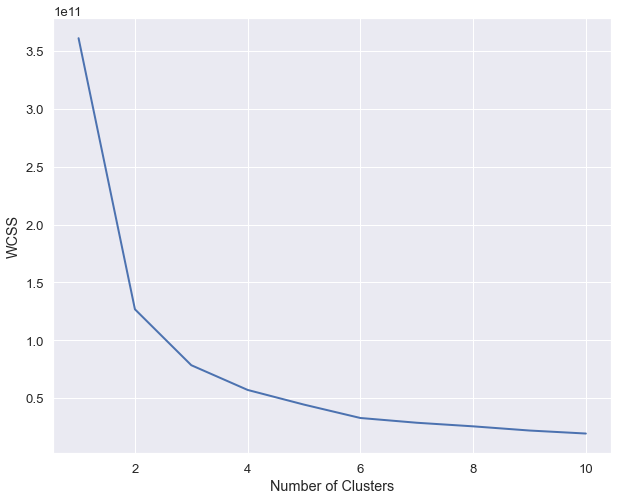

In [27]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [28]:
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=0)

In [29]:
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

### Results

In [30]:
df_segm_kmeans = df.copy()

In [31]:
df_segm_kmeans

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2,3,3478.0,2.00,2,1979
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1,3,2750.0,2.43,89,17
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1,5,7036.0,3.00,62,44
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1,2,2112.0,1.25,89,1101
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1,2,1540.0,2.43,119,58
...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,129,1
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1,4,3600.0,2.00,140,264
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1,3,2716.0,2.00,135,1
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,140,2


In [32]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [33]:
df_segm_kmeans

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count,Segment K-Means
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2,3,3478.0,2.00,2,1979,2
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1,3,2750.0,2.43,89,17,2
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1,5,7036.0,3.00,62,44,0
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1,2,2112.0,1.25,89,1101,2
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1,2,1540.0,2.43,119,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,129,1,2
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1,4,3600.0,2.00,140,264,2
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1,3,2716.0,2.00,135,1,2
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,140,2,2


In [34]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [35]:
df_segm_analysis

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
Segment K-Means,,,,,,,,,,,,
0,6867.048223,68.780444,3.074378,4.727919,2361.390863,97.781269,1.017766,4.208122,6310.238579,3.898376,128.210660,133.696701
1,30869.836066,90.379672,4.727869,5.326230,7491.836066,104.692623,1.213115,6.081967,27984.196721,4.461311,102.131148,214.606557
2,3034.236850,47.208531,1.637622,3.254393,2049.481301,96.035722,1.071754,2.702341,2450.714807,2.386525,125.089997,170.849802
3,14795.373626,82.146264,4.063132,5.361538,4035.098901,96.020714,1.065934,5.115385,13049.747253,4.351813,113.686813,184.587912
4,4807.862069,43.876552,0.223103,1.034483,23519.517241,181.043793,1.068966,2.034483,4609.172414,0.551724,91.586207,218.551724
5,52133.750000,98.146750,5.603750,6.090000,11263.200000,120.788250,1.400000,8.050000,50250.000000,5.014750,88.450000,136.900000


In [36]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  3: 'D',
                                                                  4: 'E',
                                                                  5: 'F'})

In [37]:
df_segm_kmeans

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count,Segment K-Means,Labels
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2,3,3478.0,2.00,2,1979,2,C
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1,3,2750.0,2.43,89,17,2,C
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1,5,7036.0,3.00,62,44,0,A
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1,2,2112.0,1.25,89,1101,2,C
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1,2,1540.0,2.43,119,58,2,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,129,1,2,C
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1,4,3600.0,2.00,140,264,2,C
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1,3,2716.0,2.00,135,1,2,C
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,140,2,2,C


### Plot the clusters

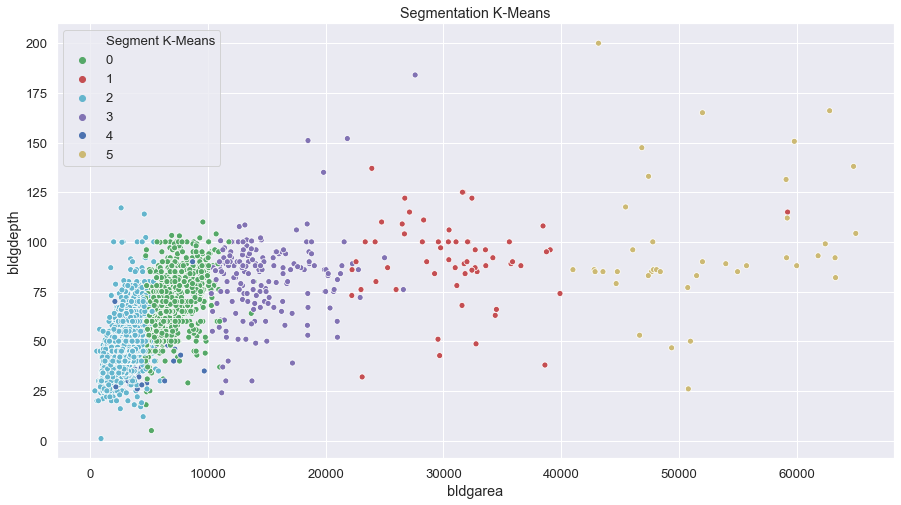

In [38]:
x_axis = df_segm_kmeans['bldgarea']
y_axis = df_segm_kmeans['bldgdepth']
plt.figure(figsize=(15,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Segment K-Means'],palette=['g','r','c','m','b','y'])
plt.title('Segmentation K-Means')
plt.show()

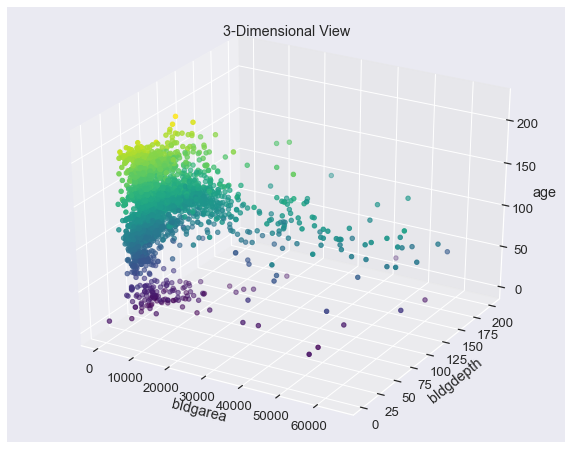

In [40]:
x_axis = df_segm_kmeans['bldgarea']
y_axis = df_segm_kmeans['bldgdepth']
z_axis = df_segm_kmeans['age']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('bldgarea')
ax.set_ylabel('bldgdepth')
ax.set_zlabel('age')
plt.title('3-Dimensional View')
plt.show()

## MeanShift Clustering

In [41]:
bandwidth = estimate_bandwidth(X,quantile=0.95, random_state=0) #Adjust Bandwidth to get clusters
bandwidth

15115.223142150136

In [42]:
meanshift = MeanShift(bandwidth=bandwidth)

In [43]:
meanshift

MeanShift(bandwidth=15115.223142150136)

In [44]:
labels = meanshift.fit_predict(X)

In [45]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

### Results

In [46]:
df_segm_meanshift = df.copy()

In [47]:
df_segm_meanshift

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2,3,3478.0,2.00,2,1979
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1,3,2750.0,2.43,89,17
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1,5,7036.0,3.00,62,44
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1,2,2112.0,1.25,89,1101
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1,2,1540.0,2.43,119,58
...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,129,1
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1,4,3600.0,2.00,140,264
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1,3,2716.0,2.00,135,1
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,140,2


In [48]:
df_segm_meanshift['Segment MeanShift'] = labels

In [49]:
df_segm_meanshift

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count,Segment MeanShift
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2,3,3478.0,2.00,2,1979,0
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1,3,2750.0,2.43,89,17,0
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1,5,7036.0,3.00,62,44,0
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1,2,2112.0,1.25,89,1101,0
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1,2,1540.0,2.43,119,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,129,1,0
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1,4,3600.0,2.00,140,264,0
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1,3,2716.0,2.00,135,1,0
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,140,2,0


In [50]:
df_segm_meanshift["Segment MeanShift"].value_counts()

0    4290
1      87
2      10
3       1
4       1
Name: Segment MeanShift, dtype: int64

In [51]:
df_segm_meanshift['Labels'] = df_segm_meanshift['Segment MeanShift'].map({0: 'A',
                                                                          1: 'B',
                                                                          2: 'C',
                                                                          3: 'D',
                                                                          4: 'E',
                                                                          })

In [52]:
df_segm_meanshift

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count,Segment MeanShift,Labels
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2,3,3478.0,2.00,2,1979,0,A
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1,3,2750.0,2.43,89,17,0,A
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1,5,7036.0,3.00,62,44,0,A
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1,2,2112.0,1.25,89,1101,0,A
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1,2,1540.0,2.43,119,58,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,129,1,0,A
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1,4,3600.0,2.00,140,264,0,A
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1,3,2716.0,2.00,135,1,0,A
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,140,2,0,A


### Plot the clusters

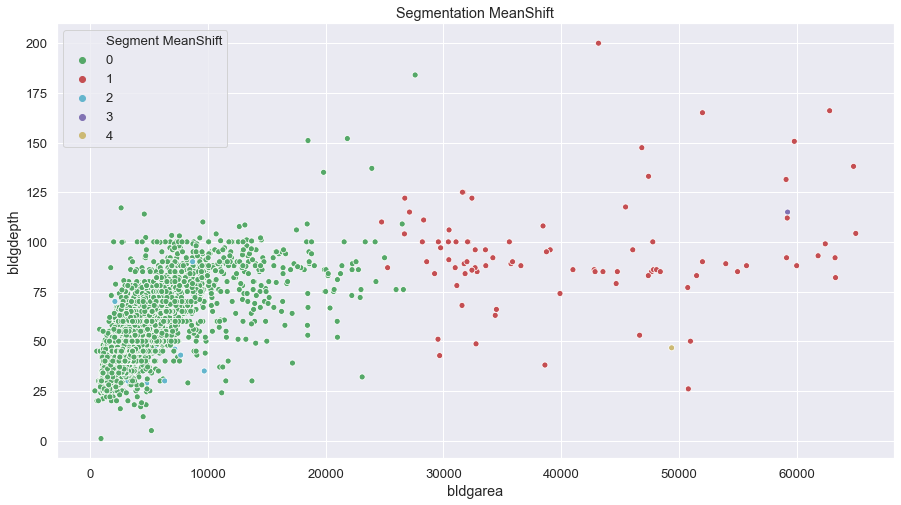

In [53]:
x_axis = df_segm_meanshift['bldgarea']
y_axis = df_segm_meanshift['bldgdepth']
plt.figure(figsize=(15,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_meanshift['Segment MeanShift'],palette=['g','r','c','m','y'])
plt.title('Segmentation MeanShift')
plt.show()

## DBSCAN method

In [54]:
epsilon = 5
minimumSamples = 4.5
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)

In [55]:
labels= db.fit_predict(X)
labels

# -1 are noise points

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [56]:
y = pd.DataFrame(labels,columns=['Cluster'])

In [57]:
y

,Cluster
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
4384,2
4385,-1
4386,-1
4387,-1


In [58]:
y['Cluster'].value_counts()

-1    4372
 2       7
 1       5
 0       5
Name: Cluster, dtype: int64

In [59]:
dbdf = pd.concat([df,y],axis=1)

In [60]:
dbdf

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count,Cluster
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2.0,3.0,3478.0,2.00,2.0,1979.0,-1.0
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1.0,3.0,2750.0,2.43,89.0,17.0,-1.0
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1.0,5.0,7036.0,3.00,62.0,44.0,-1.0
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1.0,2.0,2112.0,1.25,89.0,1101.0,-1.0
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1.0,2.0,1540.0,2.43,119.0,58.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1.0,3.0,2700.0,2.00,129.0,1.0,NaN
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1.0,4.0,3600.0,2.00,140.0,264.0,NaN
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1.0,3.0,2716.0,2.00,135.0,1.0,NaN
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1.0,3.0,2700.0,2.00,140.0,2.0,NaN


In [61]:
dbdf["Cluster"].value_counts()

-1.0    4372
 2.0       7
 1.0       5
 0.0       5
Name: Cluster, dtype: int64

In [62]:
meandbdf = dbdf.groupby(by='Cluster').mean()

In [63]:
meandbdf

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
Cluster,,,,,,,,,,,,
-1.0,5077.611597,53.650543,2.071270,3.662172,2494.975380,97.260472,1.066958,3.168201,4407.453981,2.789961,124.306719,165.736769
0.0,3003.200000,54.400000,1.660000,2.400000,1868.600000,95.688000,1.000000,2.800000,2641.200000,2.150000,122.000000,321.800000
1.0,2584.000000,55.000000,1.372000,2.560000,1933.400000,100.000000,1.000000,2.200000,2384.000000,1.838000,116.200000,52.000000
2.0,3037.428571,43.808571,1.542857,2.000000,1967.857143,100.000000,1.142857,2.714286,2423.428571,1.907143,132.428571,131.428571


### Plot the clusters

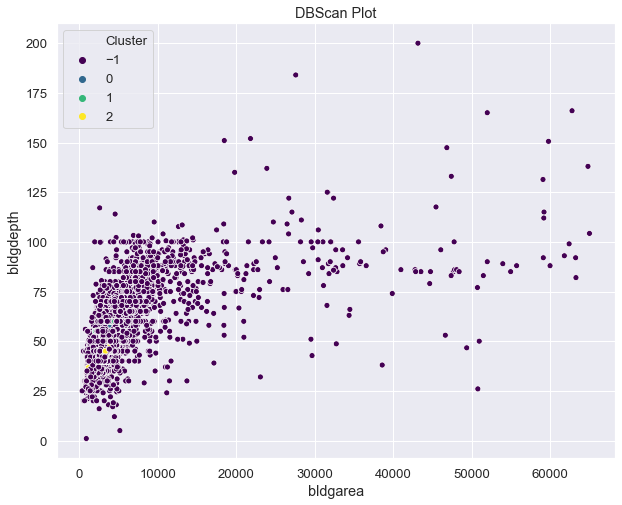

In [64]:
x_axis = dbdf['bldgarea']
y_axis = dbdf['bldgdepth']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=dbdf['Cluster'],palette='viridis')
plt.title('DBScan Plot')
plt.show()

### Remove the outliers

In [65]:
#-1 are Outliers, hence need to remove from table
db2 = dbdf[dbdf["Cluster"] != -1]

In [66]:
db2

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count,Cluster
2993,2956.0,51.00,1.74,3.0,1700.0,100.00,1.0,3.0,2956.0,3.00,112.0,457.0,0.0
2999,3564.0,58.00,2.26,3.0,1574.0,87.44,1.0,4.0,2520.0,3.00,135.0,1.0,0.0
3004,2400.0,60.00,0.98,2.0,2444.0,91.00,1.0,2.0,2400.0,0.75,95.0,168.0,0.0
3022,2296.0,45.00,1.35,2.0,1700.0,100.00,1.0,2.0,1530.0,2.00,135.0,510.0,0.0
3027,3800.0,58.00,1.97,2.0,1925.0,100.00,1.0,3.0,3800.0,2.00,133.0,473.0,0.0
3884,2360.0,55.00,1.18,2.0,2000.0,100.00,1.0,2.0,2360.0,1.25,111.0,1.0,1.0
3886,2360.0,55.00,1.18,2.0,2000.0,100.00,1.0,2.0,2360.0,1.25,110.0,219.0,1.0
3918,2104.0,55.00,1.05,2.0,2000.0,100.00,1.0,2.0,2104.0,1.25,110.0,33.0,1.0
3928,2096.0,50.00,1.05,4.8,2000.0,100.00,1.0,2.0,2096.0,3.44,115.0,2.0,1.0
3933,4000.0,60.00,2.40,2.0,1667.0,100.00,1.0,3.0,3000.0,2.00,135.0,5.0,1.0


In [67]:
db2['Cluster'].value_counts()

2.0    7
1.0    5
0.0    5
Name: Cluster, dtype: int64

In [68]:
meandb = db2.groupby(by='Cluster').mean()

In [69]:
meandb

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
Cluster,,,,,,,,,,,,
0.0,3003.200000,54.400000,1.660000,2.40,1868.600000,95.688,1.000000,2.800000,2641.200000,2.150000,122.000000,321.800000
1.0,2584.000000,55.000000,1.372000,2.56,1933.400000,100.000,1.000000,2.200000,2384.000000,1.838000,116.200000,52.000000
2.0,3037.428571,43.808571,1.542857,2.00,1967.857143,100.000,1.142857,2.714286,2423.428571,1.907143,132.428571,131.428571


### Plot the clusters

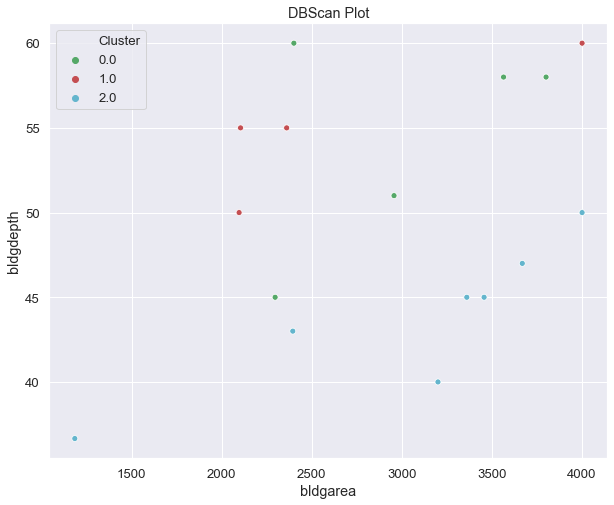

In [70]:
x_axis = db2['bldgarea']
y_axis = db2['bldgdepth']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=db2['Cluster'],palette=['g','r','c'])
plt.title('DBScan Plot')
plt.show()